In [ ]:
#!pip install pandas_profiling

In [ ]:
#!pip install mlxtend

In [1]:
from urllib import request
from urllib.request import urlretrieve as retrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import random
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from pandas_profiling import ProfileReport
import urllib.request
import os
import glob
import urllib
from scipy import stats
import timeit
from mlxtend.preprocessing import minmax_scaling

### RECUPERATION DATA

### Methode 1

In [2]:
url ='https://pkgstore.datahub.io/machine-learning/credit-g/credit-g_csv/data/ac05ce3bfd911258bd37fde1e8a3051f/credit-g_csv.csv'
retrieve(url, 'data3.csv')
files = [file for file in glob.glob("*.csv")]
data = pd.read_csv(files[0])

### Methode 2

In [3]:
def affichage(data):
    type_objet = ['int64','object']
    valeur = input('Entrez "object" pour avoir les variables categorielles et "num" pour avoir les variables numériques: ') #object ou int64
    var_numerique, var_categorielle = data.select_dtypes(include=type_objet[1]), data.select_dtypes(include=type_objet[0])  
    if valeur == type_objet[1] :
        for col in var_categorielle: 
            if data[col].nunique()<30: 
                sns.countplot (y = col, data = data) 
                plt.show()           
        print("70% ont une chance d'etre bon client -600 sont qualifiés \n-700 sont propriétaires\n-+800 travail à l'étranger")
        print("Beaucoup sont des hommes célibataires")       
    else:
        for col in var_numerique: 
            if data[col].nunique()<30: 
                sns.countplot (y = col, data = data) 
                plt.show()
    return var_numerique,var_categorielle 

In [4]:
data_set = data.copy()
data_set.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [5]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
#std duration elevé

Filtrage des données

#supprimer les doublons?
df_derived = df.filter (regex = «^ COMMON_EXP», axe = 1)
df ['field-group'] = pd.cut (df ['field1'], bins = np.linspace (min, max, bin_count))

In [7]:
## PCA : Reduction de la dimensionalité

In [8]:
#Etudier les features

Entrez "object" pour avoir les variables categorielles et "num" pour avoir les variables numériques: 


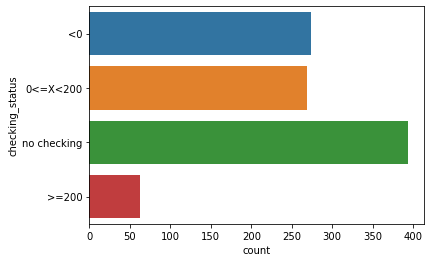

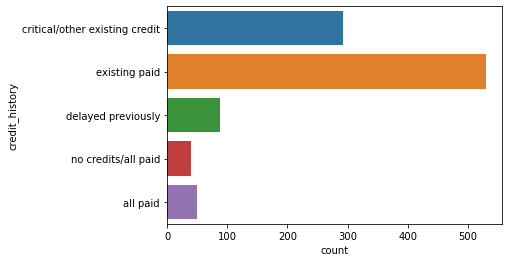

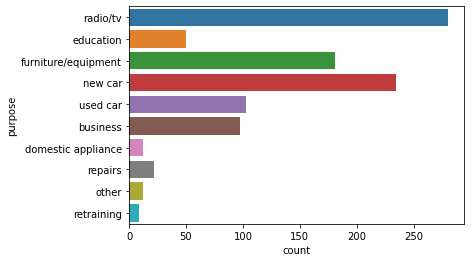

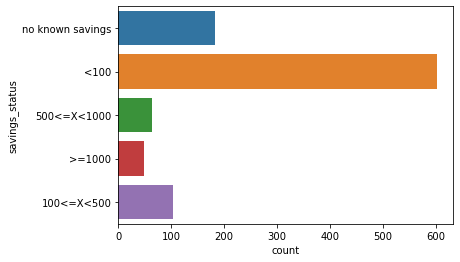

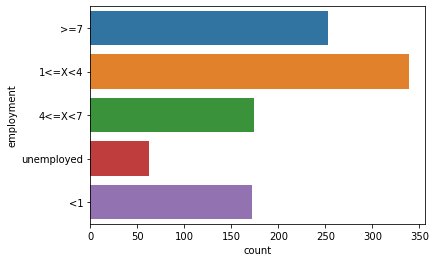

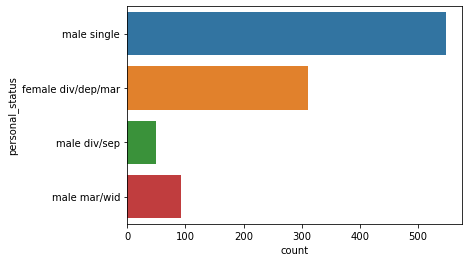

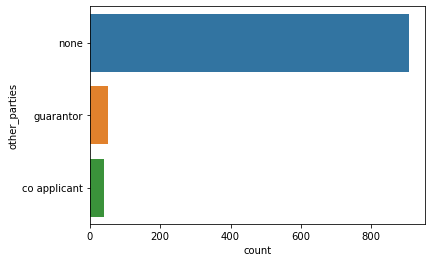

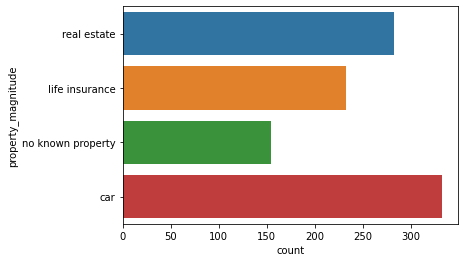

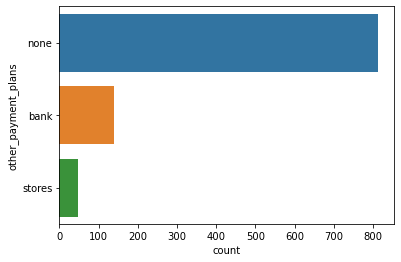

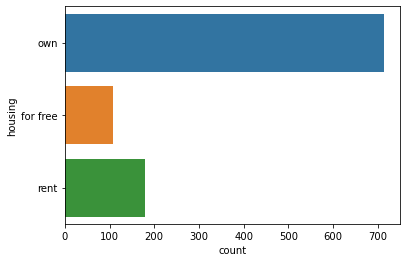

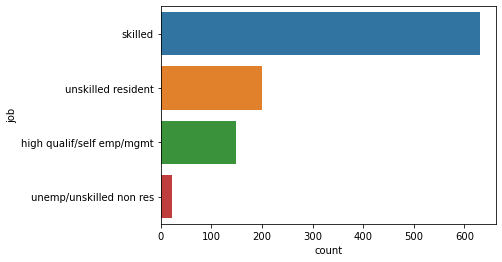

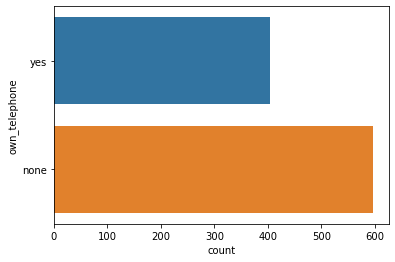

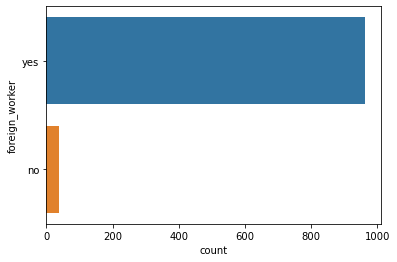

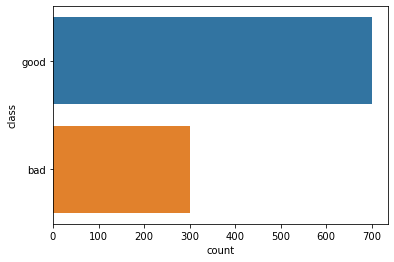

In [9]:
dataset_cat, dataset_num = affichage(data)

#variables numériques: 7
#variables catégorielles: 14
#pas de valeurs manquantes

##  CAT : NOMIMALES/ORDINALES

## 1. identification

In [10]:
#idée: identifier un caractere pour automatiser

In [11]:
dataset_cat

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,unskilled resident,none,yes,good
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes,yes,good
997,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,skilled,none,yes,good
998,<0,existing paid,radio/tv,<100,1<=X<4,male single,none,no known property,none,for free,skilled,yes,yes,bad


In [12]:
variables_list = list(dataset_cat)
slice_cat = 998
variables_ordinales, variables_nominales = [],[]
exception = ["class"]
str = '<'
for i in range(len(variables_list)-1):
    if str in dataset_cat[variables_list[i]].iloc[slice_cat]:
        variables_ordinales.append(variables_list[i])
    if not str in dataset_cat[variables_list[i]].iloc[slice_cat]:
        variables_nominales.append(variables_list[i])

#Je voulais crée une fonction mais j'ai un beug 'int64' si vous le trouvez.

In [13]:
variables_ordinales = variables_ordinales + exception
variables_ordinales

['checking_status', 'savings_status', 'employment', 'class']

In [14]:
dataset_ordinales = dataset_cat[variables_ordinales]
dataset_nominales = dataset_cat[variables_nominales]

## 2. Encoding

In [15]:
#ordinalencoder = OrdinalEncoder() 
#difficile à appliquer car on ne saura pas quelle valeur est prioritaire, 
#on peut creer un dictionnaire avec ce que l'on veut 
#et inclure dans une fonction comme variable ainsi la personne qui utilise choisi
#on peut également définir des exceptions pour les fct binaires comme class est renversé le dictionnaire
#mais le pb c'est que cela consomme en mémoire donc peut etre le faire à la main est une meilleure solution
#mais dans le cas où on aurait 200 variables de ce type faire tt à la main pose un problème
#on peut faire également si la chaine commence par une lettre->0, "<"->1, si chiffre ->2ou3 ect
#a voir si c'est a automatiser

In [16]:
dic_check = {"no checking" :"0", '<0':'1', '0<=X<200':'2', '>=200':'3',
'no known savings' :'0', '<100':'1', '100<=X<500':'2', '500<=X<1000':'3', '>=1000':'4',
'unemployed':'0', '<1':'1', '1<=X<4':'2', '4<=X<7':'3', '>=7':'4' }
char_unique = list(pd.unique(dataset_ordinales["class"]))[::-1]
dic_exception = {char:n for n, char in enumerate(char_unique)} 

In [17]:
def cat_encoding(dic_check, dic_exception, dataset_ordinales,dataset_nominales):
    dic_exception.update(dic_check)
    dataset_ordinales_encoding = dataset_ordinales.replace(dic_exception)
    dataset_nominales_encoding = pd.get_dummies(dataset_nominales, drop_first = True)
    data_cat_encoding = dataset_ordinales_encoding.merge(dataset_nominales_encoding, how = 'inner', left_index= True, right_index = True)
    #dataset_cat_encoding = pd.concat([dataset_ordinales_encoding, dataset_nominales_encoding])
    return  data_cat_encoding

In [18]:
dataset_cat_encoding =  cat_encoding(dic_check, dic_exception, dataset_ordinales,dataset_nominales)

In [19]:
dataset_cat_encoding

,checking_status,savings_status,employment,class,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,1,0,4,1,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,1
1,2,1,2,0,0,0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
2,0,1,3,1,1,0,0,0,0,1,...,1,1,0,1,0,0,0,1,0,1
3,1,1,3,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1,1,2,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3,1,0,0,1,0,0,0,...,1,1,0,1,0,0,0,1,0,1
996,1,1,2,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,1
997,0,1,4,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
998,1,1,2,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1


### 3. DATASETNUM

In [20]:
#profile = ProfileReport(dataset_num, title='Analyse du Dataset_num')
#profile.to_notebook_iframe()

<Figure size 432x288 with 0 Axes>

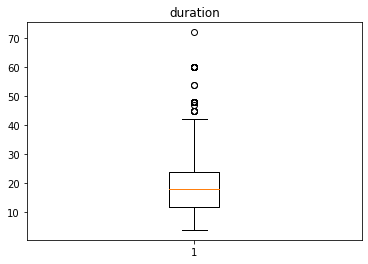

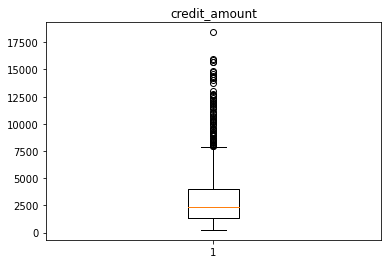

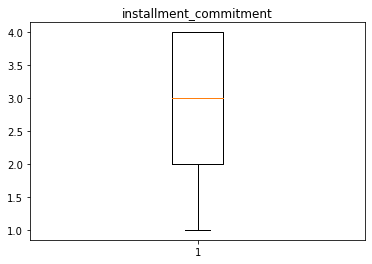

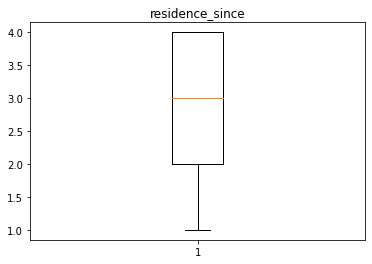

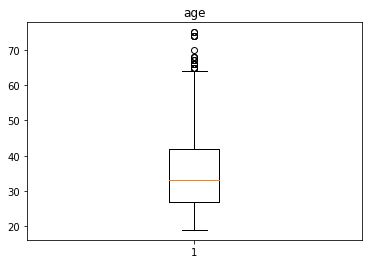

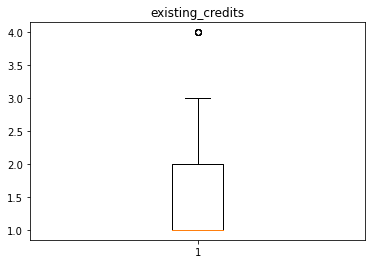

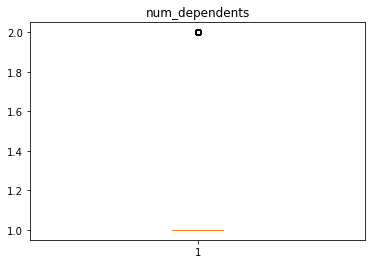

In [21]:
duration = dataset_num['duration']
credit_amount = dataset_num['credit_amount']
installment_commitment = dataset_num['installment_commitment']
residence_since = dataset_num['residence_since']
age = dataset_num[ 'age']
existing_credits = dataset_num['existing_credits']
num_dependents = dataset_num['num_dependents']
#ax = fig.add_subplot(111) #mettre une grid
fig = plt.figure()
fig, ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()
fig6,ax6 = plt.subplots()
fig7,ax7 = plt.subplots()
ax.boxplot(duration)
ax2.boxplot(credit_amount)
ax3.boxplot(installment_commitment)
ax4.boxplot(residence_since)
ax5.boxplot(age)
ax6.boxplot(existing_credits)
ax7.boxplot(num_dependents)
ax.title.set_text('duration')
ax2.title.set_text('credit_amount')
ax3.title.set_text('installment_commitment')
ax4.title.set_text('residence_since')
ax5.title.set_text('age')
ax6.title.set_text('existing_credits')
ax7.title.set_text('num_dependents')

### supprimer les outliers

In [22]:
col_num = list(dataset_num)
col_num[0]

'duration'

In [23]:
#col_name = 'duration'
def remove_outlier(dataset_num, col_name):
    q1 = dataset_num[col_name].quantile(0.25)
    q3 = dataset_num[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    dataset_num_clean = dataset_num.loc[(dataset_num[col_name] > fence_low) & (dataset_num[col_name] < fence_high)]
    return dataset_num_clean

In [24]:
dataset_num_clean = remove_outlier(dataset_num, 'duration')
dataset_num_clean = remove_outlier(dataset_num_clean, 'age')
dataset_num_clean = remove_outlier(dataset_num_clean, 'existing_credits')


In [25]:
dataset_num_clean

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
2,12,2096,2,3,49,1,2
4,24,4870,3,4,53,2,2
5,36,9055,2,4,35,1,2
6,24,2835,3,4,53,1,1
7,36,6948,2,2,35,1,1
...,...,...,...,...,...,...,...
993,36,3959,4,3,30,1,1
994,12,2390,4,3,50,1,1
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1


### Normalisation et/ou  Scaling et/ou transformation

/Users/claudetob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/claudetob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


IndexError: list index out of range

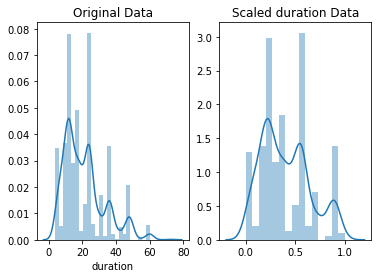

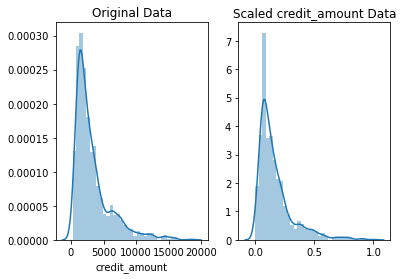

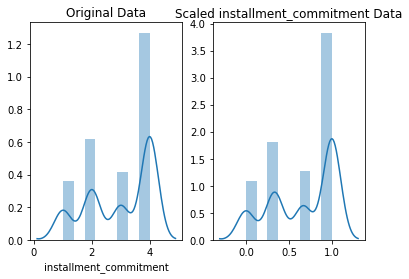

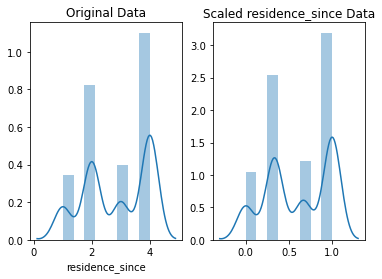

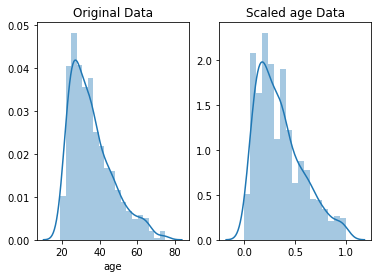

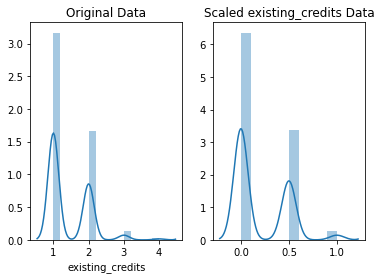

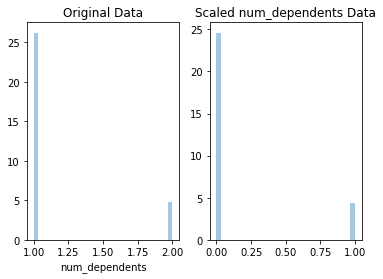

In [28]:
# mix-max scale the data between 0 and 1
n = len(dataset_num_clean)-1
k = list(dataset_num)
for i in range(n):
    scaled_data = minmax_scaling(dataset_num_clean[k[i]], columns = [0])
    original_data = dataset_num[k[i]]
# plot both together to compare
    fig, ax=plt.subplots(1,2)
    sns.distplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled {fname} Data".format(fname = k[i]))

### Normalisation

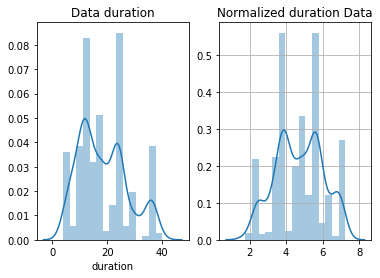

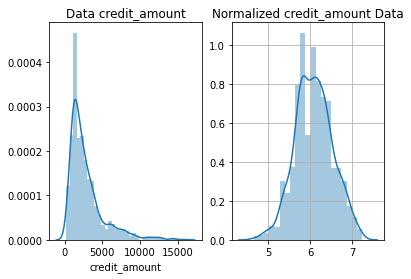

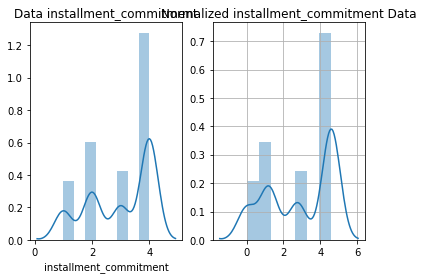

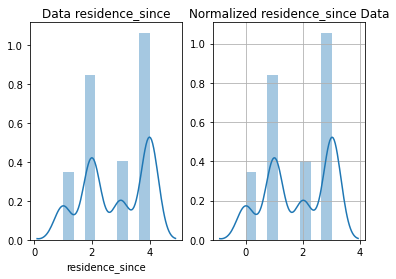

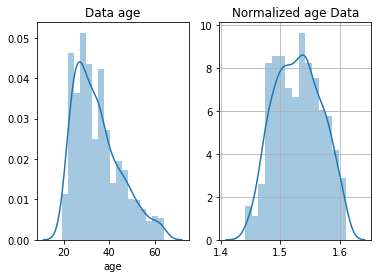

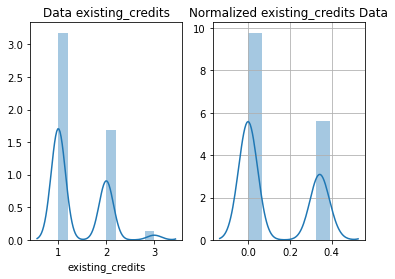

In [29]:
n = len(list(dataset_num))-1
k = list(dataset_num)
for i in range(n):
    original_data = dataset_num_clean[k[i]]
    normalized_data = stats.boxcox(original_data)
#'duration', 'credit_amount',  'age'
# plot both together to compare
    fig, ax = plt.subplots(1,2)
    sns.distplot(original_data, ax=ax[0])
    ax[0].set_title("Data {fname}".format(fname = k[i]))
    sns.distplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized {fname} Data".format(fname = k[i]))
    plt.grid()

In [30]:
dataset_num_clean


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
2,12,2096,2,3,49,1,2
4,24,4870,3,4,53,2,2
5,36,9055,2,4,35,1,2
6,24,2835,3,4,53,1,1
7,36,6948,2,2,35,1,1
...,...,...,...,...,...,...,...
993,36,3959,4,3,30,1,1
994,12,2390,4,3,50,1,1
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1


### Corrélation

In [31]:
corrs = dataset_num_clean.corr() 
corrs

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.526201,0.142856,0.042972,-0.044842,0.037070,-0.061386
credit_amount,0.526201,1.000000,-0.267934,0.034843,0.013304,0.073494,0.037129
installment_commitment,0.142856,-0.267934,1.000000,0.017987,0.055833,0.005644,-0.101103
residence_since,0.042972,0.034843,0.017987,1.000000,0.253528,0.072419,0.038854
age,-0.044842,0.013304,0.055833,0.253528,1.000000,0.116946,0.150038
existing_credits,0.037070,0.073494,0.005644,0.072419,0.116946,1.000000,0.091128
num_dependents,-0.061386,0.037129,-0.101103,0.038854,0.150038,0.091128,1.000000


In [32]:
#dataset_num_clean['']
dataset_num_clean['credit_amount'] = minmax_scaling(dataset_num_clean['credit_amount'], columns =[0])
#credit_amount scaling 
dataset_num_clean['age'] = minmax_scaling(dataset_num_clean['age'], columns =[0])
#data duration normalisation
dataset_num_clean

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
2,12,0.118280,2,3,0.666667,1,2
4,24,0.296021,3,4,0.755556,2,2
5,36,0.564170,2,4,0.355556,1,2
6,24,0.165631,3,4,0.755556,1,1
7,36,0.429166,2,2,0.355556,1,1
...,...,...,...,...,...,...,...
993,36,0.237650,4,3,0.244444,1,1
994,12,0.137118,4,3,0.688889,1,1
995,12,0.095214,3,4,0.266667,1,1
996,30,0.231114,4,4,0.466667,1,1


In [33]:
#plt.figure (figsize = (10,8)) 
#sns.heatmap (corrs, cmap = 'RdBu_r', annot = True) 
#plt.show ()

In [34]:
dataset_num_final = dataset_num_clean

### FINAL DATASET

In [35]:
def dataset_encoding(nlignes_num, ncol_num, dataset_cat_encoding, dataset_num):
    dataset_cat_encoding = dataset_cat_encoding[:nlignes_num]
    dataset_encoding = dataset_num.merge(dataset_cat_encoding, how = 'inner', left_index= True, right_index = True)
    return dataset_encoding

In [36]:
nlignes_num , ncol_num = dataset_num_final.shape[0] , dataset_num.shape[1]

In [37]:
dataset_encoding_final = dataset_encoding (nlignes_num, ncol_num, dataset_cat_encoding, dataset_num_final)

In [38]:
dataset_encoding_final

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,savings_status,employment,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
2,12,0.118280,2,3,0.666667,1,2,0,1,3,...,1,1,0,1,0,0,0,1,0,1
4,24,0.296021,3,4,0.755556,2,2,1,1,2,...,0,1,0,0,0,1,0,0,0,1
5,36,0.564170,2,4,0.355556,1,2,0,0,2,...,0,1,0,0,0,0,0,1,1,1
6,24,0.165631,3,4,0.755556,1,1,0,3,4,...,0,1,0,1,0,1,0,0,0,1
7,36,0.429166,2,2,0.355556,1,1,2,1,2,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,12,0.034920,4,4,0.755556,1,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
886,24,0.164990,4,3,0.333333,2,2,2,0,3,...,0,1,0,1,0,1,0,0,1,1
888,36,0.407766,4,4,0.333333,2,1,0,1,4,...,0,1,0,1,0,0,0,0,1,1
889,28,0.485295,3,4,0.466667,2,2,0,0,1,...,1,0,0,0,1,1,0,0,1,1


Entrez "object" pour avoir les variables categorielles et "num" pour avoir les variables numériques: object


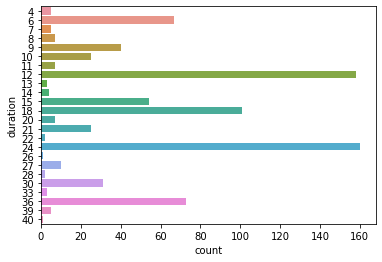

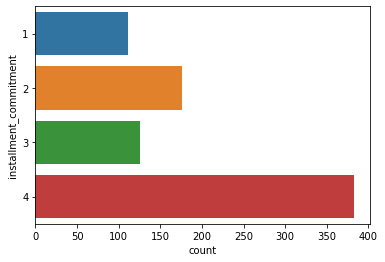

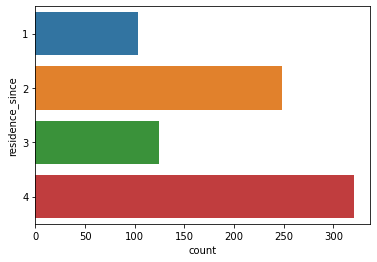

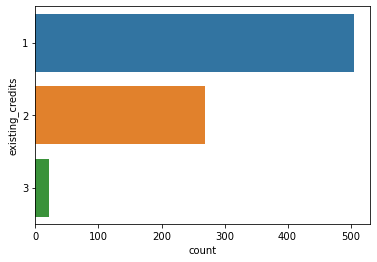

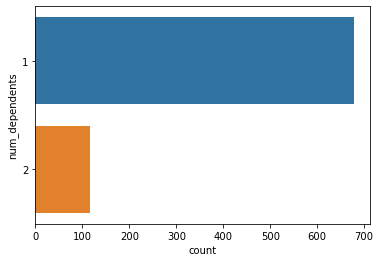

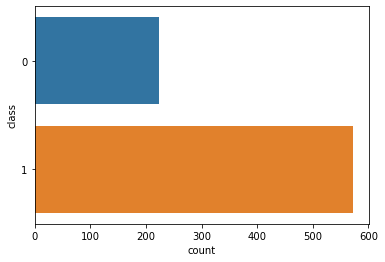

70% ont une chance d'etre bon client -600 sont qualifiés 
-700 sont propriétaires
-+800 travail à l'étranger
Beaucoup sont des hommes célibataires


(    checking_status savings_status employment
 2                 0              1          3
 4                 1              1          2
 5                 0              0          2
 6                 0              3          4
 7                 2              1          2
 ..              ...            ...        ...
 885               1              1          1
 886               2              0          3
 888               0              1          4
 889               0              0          1
 891               0              1          4
 
 [796 rows x 3 columns],
      duration  installment_commitment  residence_since  existing_credits  \
 2          12                       2                3                 1   
 4          24                       3                4                 2   
 5          36                       2                4                 1   
 6          24                       3                4                 1   
 7          36          

In [41]:
affichage(dataset_encoding_final)

Entrez "object" pour avoir les variables categorielles et "num" pour avoir les variables numériques: num


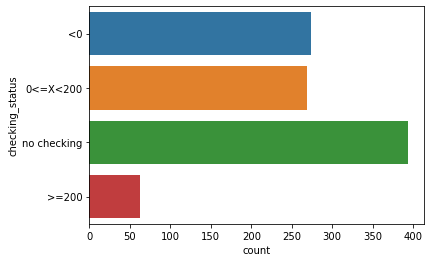

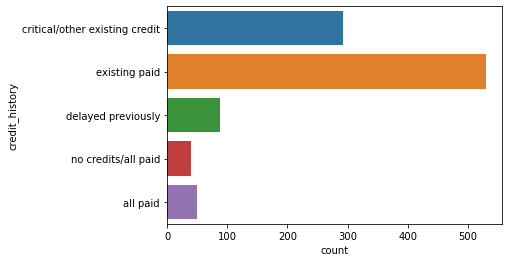

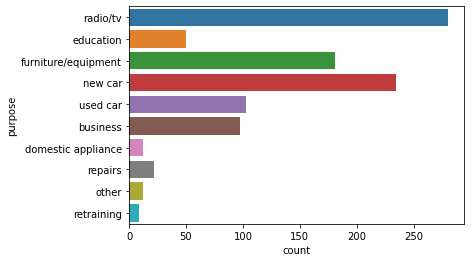

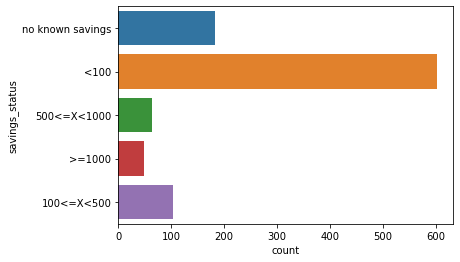

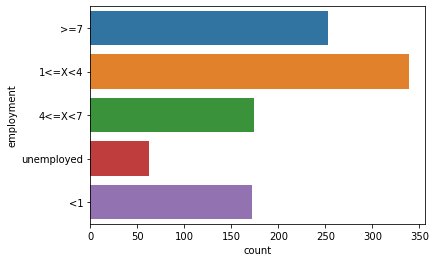

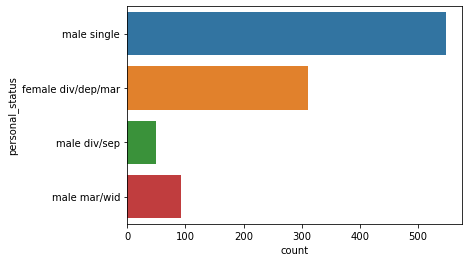

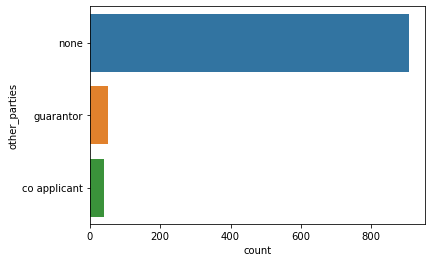

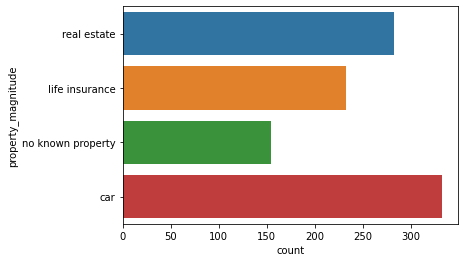

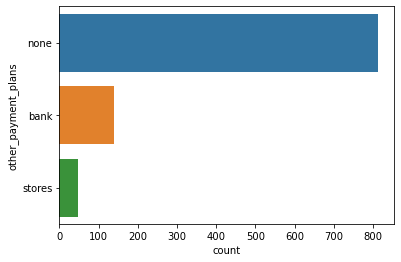

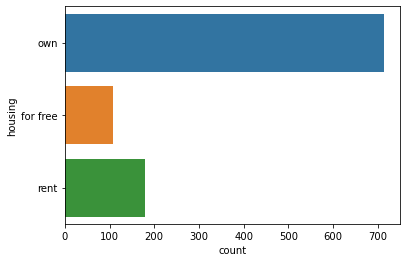

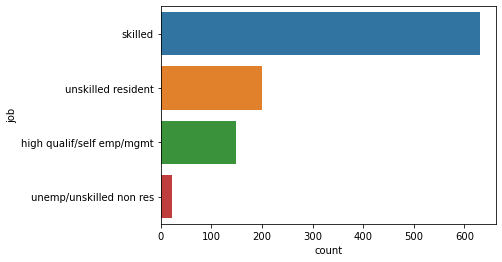

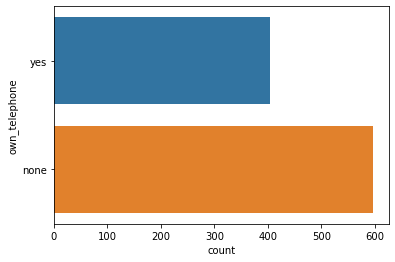

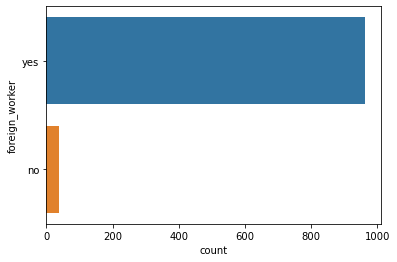

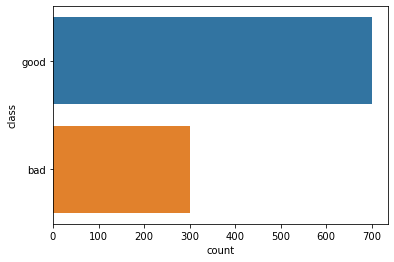

(    checking_status                  credit_history              purpose  \
 0                <0  critical/other existing credit             radio/tv   
 1          0<=X<200                   existing paid             radio/tv   
 2       no checking  critical/other existing credit            education   
 3                <0                   existing paid  furniture/equipment   
 4                <0              delayed previously              new car   
 ..              ...                             ...                  ...   
 995     no checking                   existing paid  furniture/equipment   
 996              <0                   existing paid             used car   
 997     no checking                   existing paid             radio/tv   
 998              <0                   existing paid             radio/tv   
 999        0<=X<200  critical/other existing credit             used car   
 
        savings_status  employment     personal_status other_parties  \
 0

In [40]:
affichage(data)

In [42]:
#comparer lancien et le nouveau data pour s'assurer que les transformation non pas trop biasés les données
#essayer de faire tourner les modeles pour voir si il est plus intéressant de normaliser ou scaler les données ect